In [1]:
import tensorflow as tf
import tensorflow.keras.datasets.mnist as mnist
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
import tensorflow.keras.datasets.mnist as mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Min value and Max Value in x_train:

In [3]:
x_train.min(), x_train.max()

(0, 255)

Normalisation:

In [4]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

current min and max value of x_train

In [5]:
x_train_norm.min(), x_train_norm.max()

(0.0, 1.0)

In [6]:
tf.random.set_seed(45)

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_1 = model1.fit(x_train_norm, y_train, epochs=10, validation_data=(x_test_norm, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8738 - loss: 0.4528 - val_accuracy: 0.9534 - val_loss: 0.1527
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9588 - loss: 0.1393 - val_accuracy: 0.9660 - val_loss: 0.1127
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9714 - loss: 0.0955 - val_accuracy: 0.9701 - val_loss: 0.0992
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9787 - loss: 0.0726 - val_accuracy: 0.9711 - val_loss: 0.0920
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9832 - loss: 0.0575 - val_accuracy: 0.9728 - val_loss: 0.0886
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9870 - loss: 0.0458 - val_accuracy: 0.9735 - val_loss: 0.0893
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9899 - loss: 0.0366 - val_accuracy: 0.9729 - val_loss: 0.0926
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9925 - loss: 0.0290

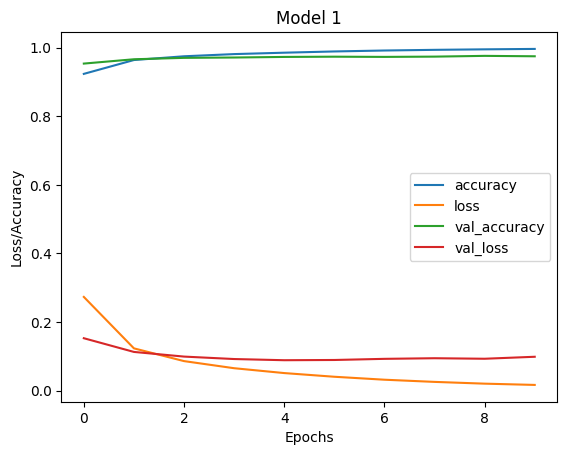

In [7]:
pd.DataFrame(history_1.history).plot()
plt.title('Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.show()

In [8]:
tf.random.set_seed(45)

model4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/5))
history_4 = model4.fit(x_train_norm, y_train, epochs=10, validation_data=(x_test_norm, y_test), callbacks = [lr_scheduler])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8725 - loss: 0.4529 - val_accuracy: 0.9567 - val_loss: 0.1456 - learning_rate: 0.0010
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9557 - loss: 0.1495 - val_accuracy: 0.9687 - val_loss: 0.1041 - learning_rate: 0.0016
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9663 - loss: 0.1108 - val_accuracy: 0.9713 - val_loss: 0.0952 - learning_rate: 0.0025
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9678 - loss: 0.1052 - val_accuracy: 0.9641 - val_loss: 0.1314 - learning_rate: 0.0040
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9600 - loss: 0.1293 - val_accuracy: 0.9638 - val_loss: 0.1393 - learning_rate: 0.0063
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9528 - loss: 0.1820 - val_accuracy: 0.9529 - val_loss: 0.1962 - learning_rate: 0.0100
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9405 - l

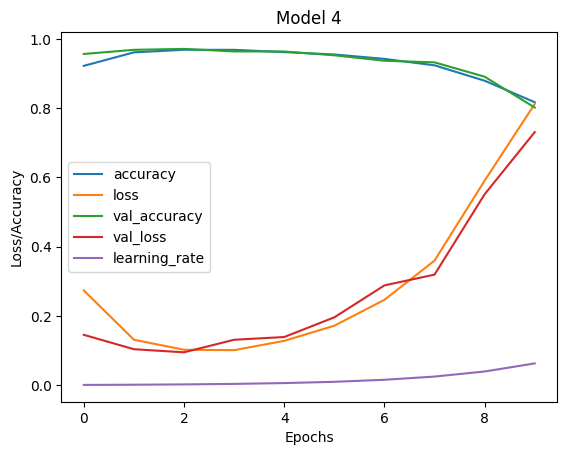

In [9]:
pd.DataFrame(history_4.history).plot()
plt.title('Model 4')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.show()

In [10]:
10**-3

0.001

In [11]:
tf.random.set_seed(45)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_5 = model.fit(x_train, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.1179 - loss: 2.4864
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2231 - loss: 1.9718
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2646 - loss: 1.8023
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.2719 - loss: 1.7699
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2795 - loss: 1.7548
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.2893 - loss: 1.7425
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2962 - loss: 1.7226
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2976 - loss: 1.7083
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2980 - loss: 1.6964
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2955 - loss: 1.6860


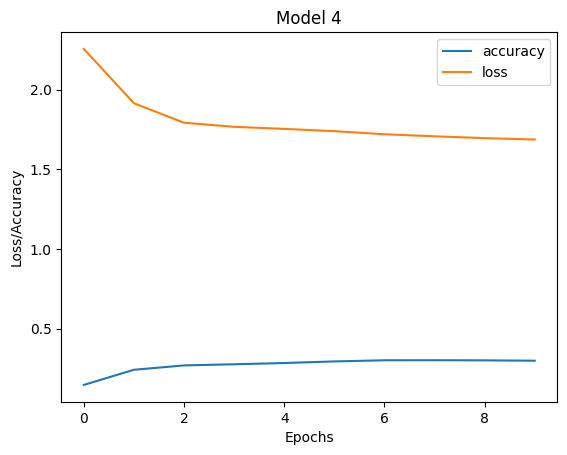

In [12]:
pd.DataFrame(history_5.history).plot()
plt.title('Model 4')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.show()

In [13]:
tf.random.set_seed(45)

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_6 = model2.fit(x_train_norm, y_train, epochs=10, validation_data=(x_test_norm, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8716 - loss: 0.4550 - val_accuracy: 0.9554 - val_loss: 0.1493
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9581 - loss: 0.1429 - val_accuracy: 0.9676 - val_loss: 0.1092
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9717 - loss: 0.0979 - val_accuracy: 0.9697 - val_loss: 0.0965
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9789 - loss: 0.0737 - val_accuracy: 0.9692 - val_loss: 0.0933
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9830 - loss: 0.0584 - val_accuracy: 0.9720 - val_loss: 0.0884
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9873 - loss: 0.0468 - val_accuracy: 0.9712 - val_loss: 0.0919
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9897 - loss: 0.0380 - val_accuracy: 0.9737 - val_loss: 0.0893
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9926 - loss: 0.0296 - 

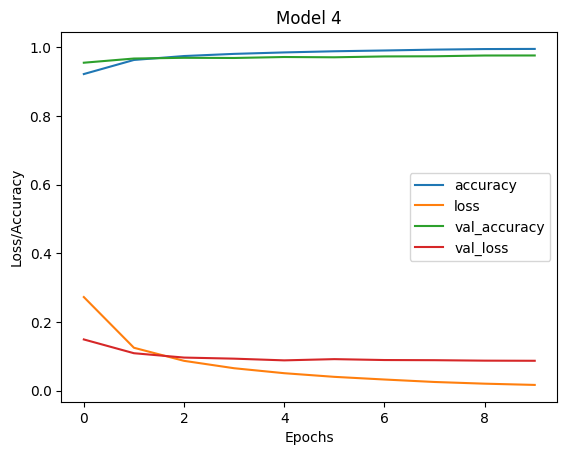

In [14]:
pd.DataFrame(history_6.history).plot()
plt.title('Model 4')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.show()